#           Predicting The Severity Of An Accident

###### By Kerman Sanjuan

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will predict the severity of an accident. Specifically, this report will be targeted to governs and organization interested on improving  **Road sequirity** in **United States**.

There's a bunch of data, so we will try to analyze and use the most relevant. 

At the end of the project we should be able to predict in certain way the severity and be usefull to the world :)

## Data <a name="data"></a>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msg

In [37]:
df = pd.read_csv('US_Accidents_June20-1-1.csv')

Here we load the data, credits to the creator : Moosavi, Sobhan,Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath from “A Coun-trywide Traffic Accident Dataset.”,

In [38]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [39]:
df.shape

(175687, 49)

As we see, the dataset contains 49 different features and we have almost 200 thousand data samples. By the way, we have a bunch of categorical data, so we will get rid of it.

But first, we will chanche de index of the dataset

In [40]:
df.set_index("ID")

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,
A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A-175684,MapQuest,201.0,2,2016-08-18 08:40:36,2016-08-18 09:25:36,38.631863,-90.383659,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
A-175685,MapQuest,201.0,2,2016-08-18 08:48:42,2016-08-18 09:48:42,41.835400,-88.010834,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day
A-175686,MapQuest,229.0,2,2016-08-18 09:00:27,2016-08-18 09:45:27,41.995152,-88.165894,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day


The order of droping data will be this:

    1. Not relevant data
    2. No enough data (Too  many  NaN cases)

In [41]:
df.isnull().sum().sort_values(ascending = True)

ID                            0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Country                       0
Traffic_Calming               0
State                         0
County                        0
Traffic_Signal                0
Side                          0
Street                        0
Turning_Loop                  0
Description                   0
Distance(mi)                  0
Start_Lng                     0
Start_Lat                     0
End_Time                      0
Start_Time                    0
Severity                      0
TMC                           0
Source                        0
Bump                          0
Amenity                       0
Sunrise_Sunset               14
Civil_Twilight               14
Astronomical_Twilight        14
City    

In [42]:
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())



Features :
     : ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Missing values    : 855662

Unique values :  
 ID                       175687
Source                        2
TMC                          21
Severity                      4
Start_Time               173473
End_Time                 171036
Start_Lat                 67935
Start_Lng                 66952
En

In [43]:
df.drop(['Pressure(in)','Wind_Direction','Timezone','Country','Airport_Code','Astronomical_Twilight','Nautical_Twilight','State','Zipcode','Number','Street','Side','City','County'],axis = 1,inplace = True)

I dont like much this way of visualization, so we will draw the missing values

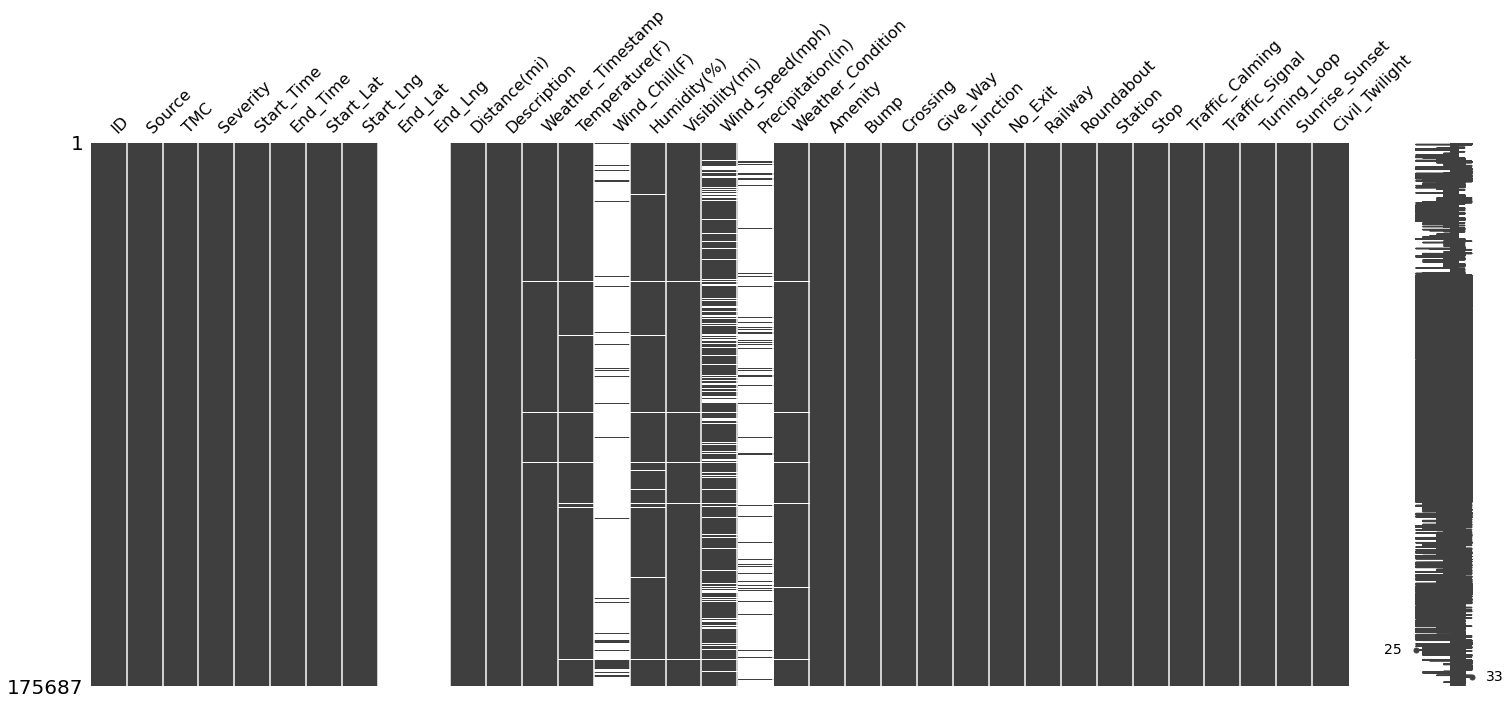

In [44]:
msg.matrix(df)

In [45]:
df.isnull().sum().sort_values(ascending = True)

ID                        0
Amenity                   0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Bump                      0
Description               0
Traffic_Signal            0
Turning_Loop              0
Start_Lng                 0
Start_Lat                 0
End_Time                  0
Start_Time                0
Severity                  0
TMC                       0
Source                    0
Distance(mi)              0
Crossing                  0
Civil_Twilight           14
Sunrise_Sunset           14
Weather_Timestamp      1529
Weather_Condition      2593
Temperature(F)         2756
Visibility(mi)         2842
Humidity(%)            3157
Wind_Speed(mph)       35985
Precipitation(in)    161740
Wind_Chill(F)        164162
End_Lng              175687
End_Lat              175687
dtype: int64

We will drop the columns with most missing values


In [46]:
df.drop(['Start_Time','End_Time','Start_Lat','Start_Lng','Description','Weather_Timestamp','End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'],axis = 1,inplace = True)

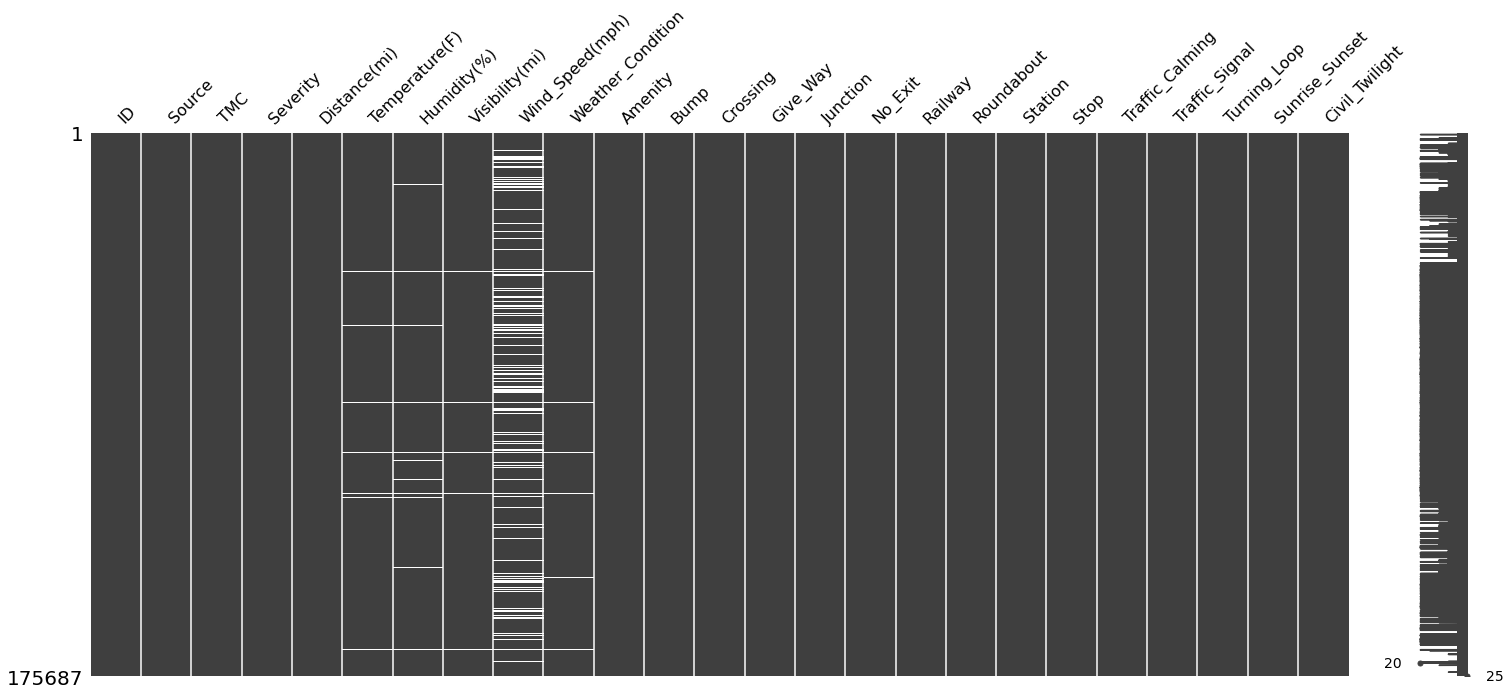

In [47]:
msg.matrix(df)

In [48]:
df.shape

(175687, 25)

Now, we will get rid of the most irrelevant categorical values

In [49]:
df.select_dtypes(exclude=['int','float']).columns

Index(['ID', 'Source', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight'],
      dtype='object')

In [50]:
df

,ID,Source,TMC,Severity,Distance(mi),Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,A-1,MapQuest,201.0,3,0.01,36.9,91.0,10.0,NaN,Light Rain,...,False,False,False,False,False,False,False,False,Night,Night
1,A-2,MapQuest,201.0,2,0.01,37.9,100.0,10.0,NaN,Light Rain,...,False,False,False,False,False,False,False,False,Night,Night
2,A-3,MapQuest,201.0,2,0.01,36.0,100.0,10.0,3.5,Overcast,...,False,False,False,False,False,False,True,False,Night,Night
3,A-4,MapQuest,201.0,3,0.01,35.1,96.0,9.0,4.6,Mostly Cloudy,...,False,False,False,False,False,False,False,False,Night,Day
4,A-5,MapQuest,201.0,2,0.01,36.0,89.0,6.0,3.5,Mostly Cloudy,...,False,False,False,False,False,False,True,False,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175682,A-175684,MapQuest,201.0,2,0.00,82.0,65.0,10.0,8.1,Partly Cloudy,...,False,False,False,False,False,False,False,False,Day,Day
175683,A-175685,MapQuest,201.0,2,0.00,73.0,90.0,10.0,9.2,Mostly Cloudy,...,False,False,False,False,False,False,True,False,Day,Day
175684,A-175686,MapQuest,229.0,2,0.00,75.0,82.0,10.0,4.6,Mostly Cloudy,...,False,False,False,False,False,False,True,False,Day,Day
175685,A-175687,MapQuest,229.0,2,0.00,73.9,85.0,10.0,4.6,Mostly Cloudy,...,False,False,False,False,False,False,False,False,Day,Day


In [51]:
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())


Features :
     : ['ID', 'Source', 'TMC', 'Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight']

Missing values    : 47361

Unique values :  
 ID                   175687
Source                    2
TMC                      21
Severity                  4
Distance(mi)            561
Temperature(F)          626
Humidity(%)              97
Visibility(mi)           37
Wind_Speed(mph)          68
Weather_Condition        51
Amenity                   2
Bump                      2
Crossing                  2
Give_Way                  2
Junction                  2
No_Exit                   2
Railway                   2
Roundabout                2
Station                   2
Stop                      2
Traffic_Calming           2
Traf

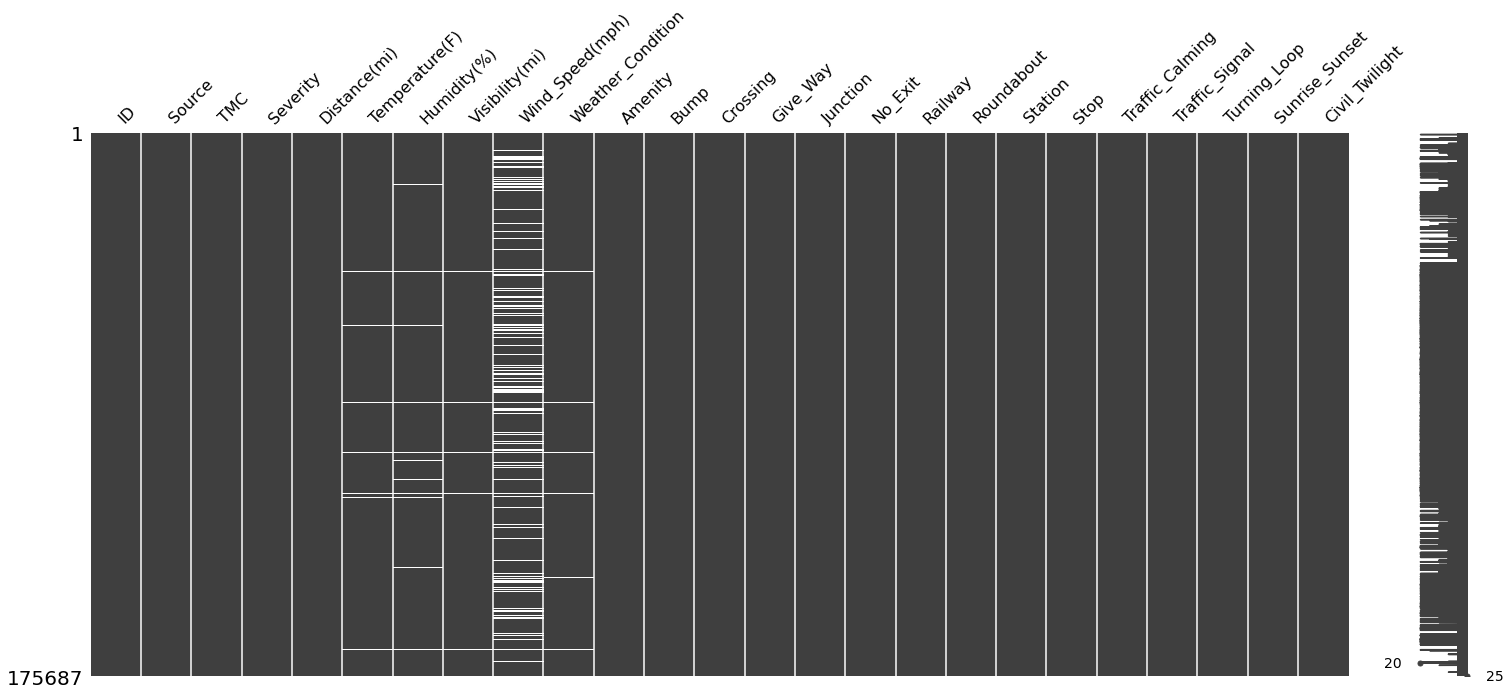

In [52]:
msg.matrix(df)

In [53]:
df.head()

,ID,Source,TMC,Severity,Distance(mi),Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,A-1,MapQuest,201.0,3,0.01,36.9,91.0,10.0,NaN,Light Rain,...,False,False,False,False,False,False,False,False,Night,Night
1,A-2,MapQuest,201.0,2,0.01,37.9,100.0,10.0,NaN,Light Rain,...,False,False,False,False,False,False,False,False,Night,Night
2,A-3,MapQuest,201.0,2,0.01,36.0,100.0,10.0,3.5,Overcast,...,False,False,False,False,False,False,True,False,Night,Night
3,A-4,MapQuest,201.0,3,0.01,35.1,96.0,9.0,4.6,Mostly Cloudy,...,False,False,False,False,False,False,False,False,Night,Day
4,A-5,MapQuest,201.0,2,0.01,36.0,89.0,6.0,3.5,Mostly Cloudy,...,False,False,False,False,False,False,True,False,Day,Day


In [54]:
df.select_dtypes(exclude=['int','float','bool']).columns

Index(['ID', 'Source', 'Weather_Condition', 'Sunrise_Sunset',
       'Civil_Twilight'],
      dtype='object')

In [55]:
df.drop('Source',axis = 1,inplace= True)

In [56]:
df

,ID,TMC,Severity,Distance(mi),Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,Amenity,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,A-1,201.0,3,0.01,36.9,91.0,10.0,NaN,Light Rain,False,...,False,False,False,False,False,False,False,False,Night,Night
1,A-2,201.0,2,0.01,37.9,100.0,10.0,NaN,Light Rain,False,...,False,False,False,False,False,False,False,False,Night,Night
2,A-3,201.0,2,0.01,36.0,100.0,10.0,3.5,Overcast,False,...,False,False,False,False,False,False,True,False,Night,Night
3,A-4,201.0,3,0.01,35.1,96.0,9.0,4.6,Mostly Cloudy,False,...,False,False,False,False,False,False,False,False,Night,Day
4,A-5,201.0,2,0.01,36.0,89.0,6.0,3.5,Mostly Cloudy,False,...,False,False,False,False,False,False,True,False,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175682,A-175684,201.0,2,0.00,82.0,65.0,10.0,8.1,Partly Cloudy,False,...,False,False,False,False,False,False,False,False,Day,Day
175683,A-175685,201.0,2,0.00,73.0,90.0,10.0,9.2,Mostly Cloudy,False,...,False,False,False,False,False,False,True,False,Day,Day
175684,A-175686,229.0,2,0.00,75.0,82.0,10.0,4.6,Mostly Cloudy,False,...,False,False,False,False,False,False,True,False,Day,Day
175685,A-175687,229.0,2,0.00,73.9,85.0,10.0,4.6,Mostly Cloudy,False,...,False,False,False,False,False,False,False,False,Day,Day


In [57]:
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())


Features :
     : ['ID', 'TMC', 'Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight']

Missing values    : 47361

Unique values :  
 ID                   175687
TMC                      21
Severity                  4
Distance(mi)            561
Temperature(F)          626
Humidity(%)              97
Visibility(mi)           37
Wind_Speed(mph)          68
Weather_Condition        51
Amenity                   2
Bump                      2
Crossing                  2
Give_Way                  2
Junction                  2
No_Exit                   2
Railway                   2
Roundabout                2
Station                   2
Stop                      2
Traffic_Calming           2
Traffic_Signal            2
Turning_Loop  

In [58]:
print(df['Weather_Condition'].unique())

['Light Rain' 'Overcast' 'Mostly Cloudy' 'Rain' 'Light Snow' 'Haze'
 'Scattered Clouds' 'Partly Cloudy' 'Clear' 'Snow'
 'Light Freezing Drizzle' 'Light Drizzle' 'Fog' 'Shallow Fog' 'Heavy Rain'
 'Light Freezing Rain' 'Cloudy' 'Drizzle' nan 'Light Rain Showers' 'Mist'
 'Smoke' 'Patches of Fog' 'Light Freezing Fog' 'Light Haze'
 'Light Thunderstorms and Rain' 'Thunderstorms and Rain' 'Fair'
 'Volcanic Ash' 'Blowing Sand' 'Blowing Dust / Windy' 'Widespread Dust'
 'Fair / Windy' 'Rain Showers' 'Mostly Cloudy / Windy'
 'Light Rain / Windy' 'Hail' 'Heavy Drizzle' 'Showers in the Vicinity'
 'Thunderstorm' 'Light Rain Shower' 'Light Rain with Thunder'
 'Partly Cloudy / Windy' 'Thunder in the Vicinity' 'T-Storm'
 'Heavy Thunderstorms and Rain' 'Thunder' 'Heavy T-Storm' 'Funnel Cloud'
 'Heavy T-Storm / Windy' 'Blowing Snow' 'Light Thunderstorms and Snow']


In [59]:
df.isnull().sum().sort_values(ascending = True)

ID                       0
Turning_Loop             0
Traffic_Signal           0
Traffic_Calming          0
Stop                     0
Station                  0
Roundabout               0
Railway                  0
No_Exit                  0
Junction                 0
Give_Way                 0
Crossing                 0
Bump                     0
Amenity                  0
Distance(mi)             0
Severity                 0
TMC                      0
Sunrise_Sunset          14
Civil_Twilight          14
Weather_Condition     2593
Temperature(F)        2756
Visibility(mi)        2842
Humidity(%)           3157
Wind_Speed(mph)      35985
dtype: int64

In [60]:
df.shape

(175687, 24)

In [61]:
df.select_dtypes(include='object').fillna(\
 ...: df.select_dtypes(include='object').mode().iloc[0])


,ID,Weather_Condition,Sunrise_Sunset,Civil_Twilight
0,A-1,Light Rain,Night,Night
1,A-2,Light Rain,Night,Night
2,A-3,Overcast,Night,Night
3,A-4,Mostly Cloudy,Night,Day
4,A-5,Mostly Cloudy,Day,Day
...,...,...,...,...
175682,A-175684,Partly Cloudy,Day,Day
175683,A-175685,Mostly Cloudy,Day,Day
175684,A-175686,Mostly Cloudy,Day,Day
175685,A-175687,Mostly Cloudy,Day,Day


In [62]:
#df = pd.concat([df,pd.get_dummies(df['Weather_Condition'], prefix='Weather_Condition',dummy_na=True)],axis=1).drop(['Weather_Condition'],axis=1)

In [63]:
df.drop('Weather_Condition',axis = 1,inplace= True)

In [64]:
df['Wind_Speed(mph)'].replace(np.nan, df['Wind_Speed(mph)'].mean (),inplace = True)
df['Humidity(%)'].replace(np.nan, df['Humidity(%)'].mean (),inplace = True)
df['Visibility(mi)'].replace(np.nan, df['Visibility(mi)'].mean (),inplace = True)
df['Visibility(mi)'].replace(np.nan, df['Visibility(mi)'].mean (),inplace = True)
df['Temperature(F)'].replace(np.nan, df['Temperature(F)'].mean (),inplace = True)

In [65]:
df.isnull().sum().sort_values(ascending = True)

ID                  0
Turning_Loop        0
Traffic_Signal      0
Traffic_Calming     0
Stop                0
Station             0
Roundabout          0
Railway             0
No_Exit             0
Junction            0
Give_Way            0
Bump                0
Amenity             0
Wind_Speed(mph)     0
Visibility(mi)      0
Humidity(%)         0
Temperature(F)      0
Distance(mi)        0
Severity            0
TMC                 0
Crossing            0
Sunrise_Sunset     14
Civil_Twilight     14
dtype: int64

In [66]:
df = pd.concat([df,pd.get_dummies(df['Sunrise_Sunset'], prefix='Sunrise_Sunset ',dummy_na=True)],axis=1).drop(['Sunrise_Sunset'],axis=1)
df = pd.concat([df,pd.get_dummies(df['Civil_Twilight'], prefix='Civil_Twilight',dummy_na=True)],axis=1).drop(['Civil_Twilight'],axis=1)

In [67]:
df.isnull().sum().sort_values(ascending = True)

ID                       0
Civil_Twilight_Day       0
Sunrise_Sunset _nan      0
Sunrise_Sunset _Night    0
Sunrise_Sunset _Day      0
Turning_Loop             0
Traffic_Signal           0
Traffic_Calming          0
Stop                     0
Station                  0
Roundabout               0
Railway                  0
Civil_Twilight_Night     0
No_Exit                  0
Give_Way                 0
Crossing                 0
Bump                     0
Amenity                  0
Wind_Speed(mph)          0
Visibility(mi)           0
Humidity(%)              0
Temperature(F)           0
Distance(mi)             0
Severity                 0
TMC                      0
Junction                 0
Civil_Twilight_nan       0
dtype: int64

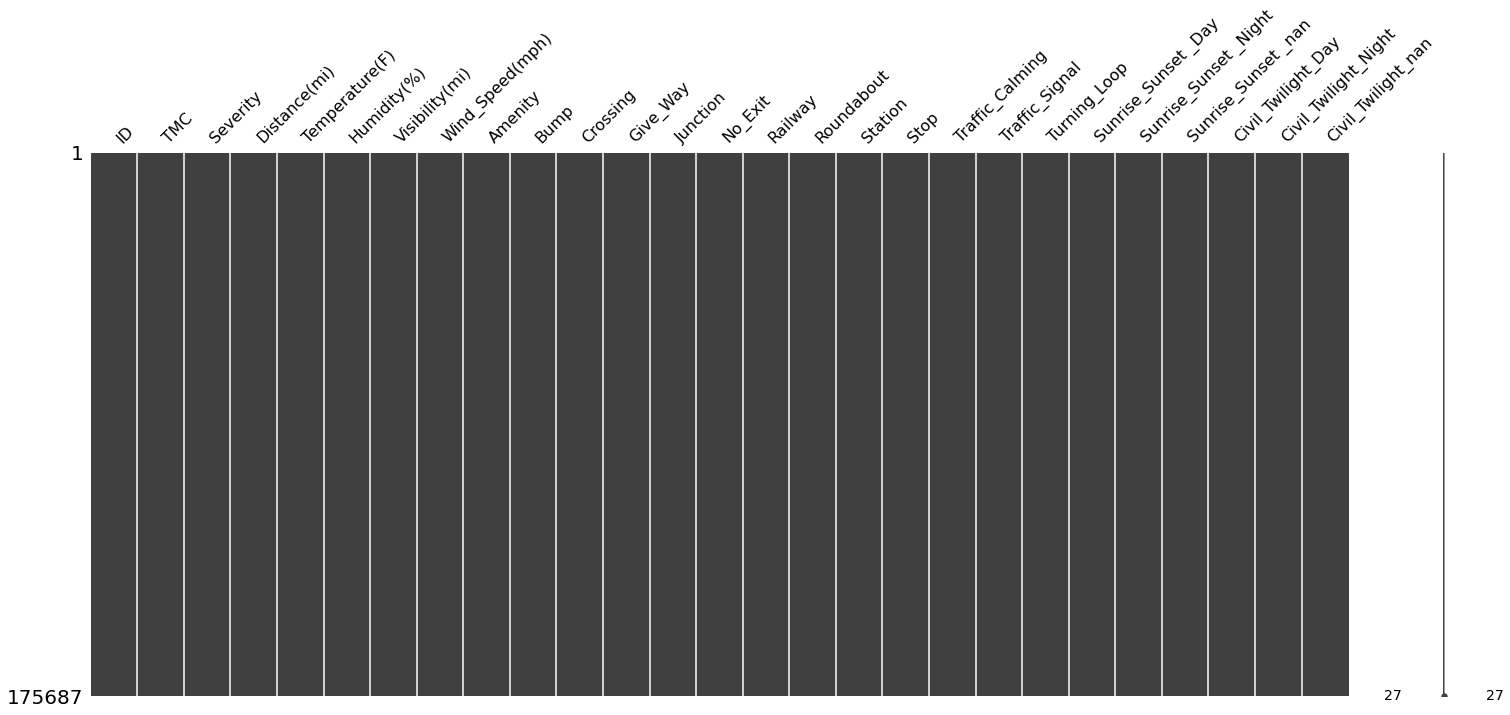

In [68]:
msg.matrix(df)

In [69]:
df.shape

(175687, 27)

In [70]:
df.describe()

,TMC,Severity,Distance(mi),Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Sunrise_Sunset _Day,Sunrise_Sunset _Night,Sunrise_Sunset _nan,Civil_Twilight_Day,Civil_Twilight_Night,Civil_Twilight_nan
count,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000
mean,209.170052,2.416804,0.030264,67.548494,63.117058,9.347344,8.331181,0.683306,0.316614,0.000080,0.726286,0.273634,0.000080
std,20.643348,0.496058,0.521301,14.316323,21.720834,1.863401,5.823619,0.465188,0.465157,0.008926,0.445865,0.445825,0.008926
min,200.000000,1.000000,0.000000,-13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201.000000,2.000000,0.000000,59.000000,49.000000,10.000000,5.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,201.000000,2.000000,0.000000,68.000000,65.000000,10.000000,8.331181,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,201.000000,3.000000,0.010000,77.000000,80.000000,10.000000,9.200000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,406.000000,4.000000,80.890000,114.100000,100.000000,80.000000,822.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
a = df.loc[:,[i for i in list(df.columns) if i not in ["Severity"]]]

In [72]:
ar = a.columns

In [73]:
X = df[ar]

In [74]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [75]:
X.drop("ID", inplace = True, axis = 1)

/Users/kerman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [77]:
y = df['Severity'].values


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (140549, 25) (140549,)
Test set: (35138, 25) (35138,)


In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
from sklearn import metrics

In [ ]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict 
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g',figsize = (100,50))
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()